## 데이터 다루기

In [1]:
# pandas 라이브러리 불러옴
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 피마 인디언 당뇨병 데이터셋 불러옴. 불러올때 각 컬럼에 해당하는 이름을 저장함
df = pd.read_csv('pima-indians-diabetes.csv',
                names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

df.head(10)

# 데이터의 전반적인 정보 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
# 각 정보별 특징을 좀더 자세히 출력
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [9]:
# 데이터 중 임신 정보와 클래스 만을 출력
df[['pregnant', 'class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [12]:
# 임신 횟수 당 당뇨병 발병 확률
df_data = df[['pregnant', 'class']] # 2개 컬럼만 선택
df_group = df_data.groupby(['pregnant'], as_index = False)  # pregnant 기준으로 그룹바이
df_group.mean().sort_values(by='pregnant', ascending=True)   # 평균을 낸 뒤 pregnant 기준 오름차순 정렬

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


#### matplotlib 라이브러리와 좀 더 정교한 그래프를 그리게끔 도와주는 seaborn 라이브러리 사용
#### heatmap() 함수 : 두 항목씩 짝을 지은 뒤 각각 어떤 패턴으로 변화하는지를 관찰하는 함수
#### 두 항목이 전혀 다른 패턴으로 변화하고 있으면 0, 비슷한 패턴으로 변할수록 1에 가까운 값 출력

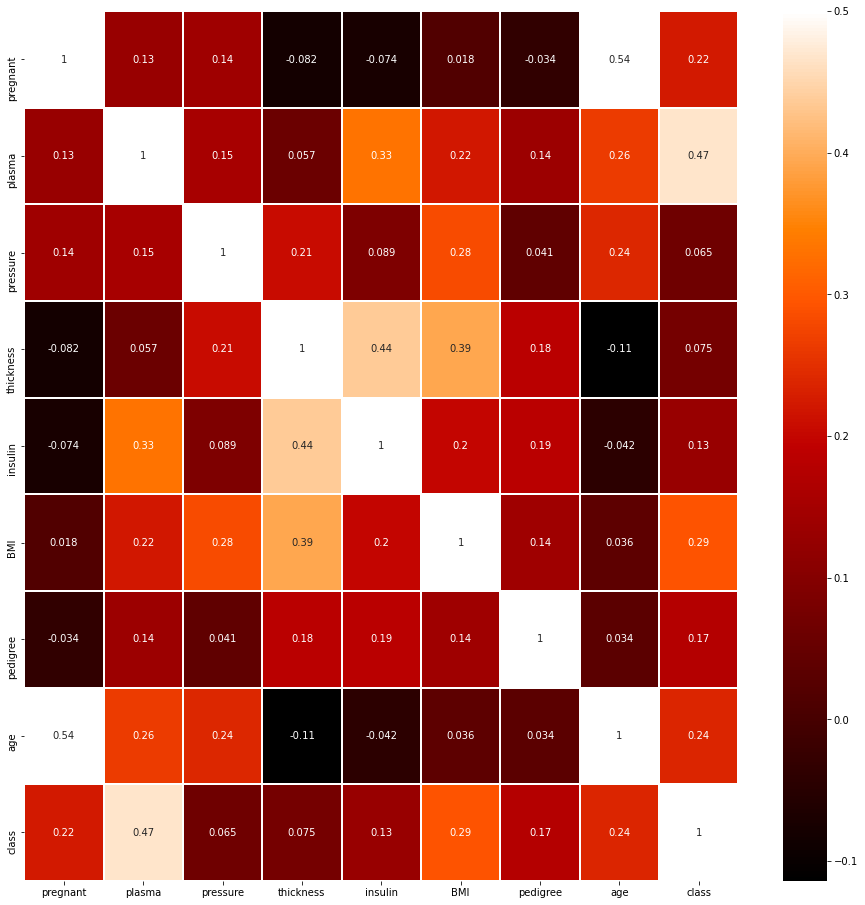

In [13]:
# 데이터 간의 상관관계를 그래프로 표현해 봅니다.
colormap = plt.cm.gist_heat   # 그래프의 색상 구성을 정합니다.
plt.figure(figsize=(16,16))   # 그래프의 크기 결정

# 그래프의 속성을 결정, vmax의 값을 0.5로 지정해 0.5에 가까울수록 밝은 색으로 표시
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

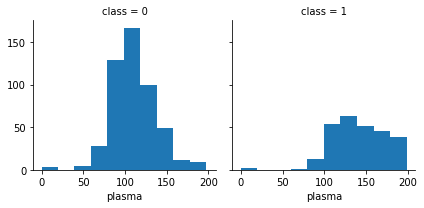

In [14]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

# 당뇨병 환자의 경우(class=1) plasma 수치가 150이상이 많다.

In [15]:
# 딥러닝을 구현하는 데 필요한 케라스 함수 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리
import numpy as np
import tensorflow as tf

# 실행할 때 마다 같은 결과를 출력하기 위해 설정부분
np.random.seed(3)
tf.random.set_seed(3)

# 데이터를 불러옴
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')
X = dataset[:, 0:8]
Y = dataset[:, 8]

# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)

# 결과를 출력
print('\n Accuracy : %.4f' % (model.evaluate(X, Y)[1]))

# 정확도 0.7721

Epoch 1/200
77/77 [==============================] - 0s 581us/step - loss: 12.0693 - acc: 0.6273
Epoch 2/200
77/77 [==============================] - 0s 584us/step - loss: 5.7426 - acc: 0.6227
Epoch 3/200
77/77 [==============================] - 0s 489us/step - loss: 3.2875 - acc: 0.5365
Epoch 4/200
77/77 [==============================] - 0s 486us/step - loss: 1.6549 - acc: 0.5589
Epoch 5/200
77/77 [==============================] - 0s 499us/step - loss: 0.8960 - acc: 0.4802
Epoch 6/200
77/77 [==============================] - 0s 497us/step - loss: 0.8696 - acc: 0.5314
Epoch 7/200
77/77 [==============================] - 0s 521us/step - loss: 0.7652 - acc: 0.6588
Epoch 8/200
77/77 [==============================] - 0s 511us/step - loss: 0.7709 - acc: 0.6785
Epoch 9/200
77/77 [==============================] - 0s 475us/step - loss: 0.7154 - acc: 0.6615
Epoch 10/200
77/77 [==============================] - 0s 499us/step - loss: 0.6585 - acc: 0.6699
Epoch 11/200
77/77 [==================

77/77 [==============================] - 0s 472us/step - loss: 0.4702 - acc: 0.7689
Epoch 169/200
77/77 [==============================] - 0s 459us/step - loss: 0.4654 - acc: 0.7755
Epoch 170/200
77/77 [==============================] - 0s 486us/step - loss: 0.4672 - acc: 0.7756
Epoch 171/200
77/77 [==============================] - 0s 472us/step - loss: 0.4478 - acc: 0.7734
Epoch 172/200
77/77 [==============================] - 0s 459us/step - loss: 0.4727 - acc: 0.7723
Epoch 173/200
77/77 [==============================] - 0s 472us/step - loss: 0.4610 - acc: 0.7641
Epoch 174/200
77/77 [==============================] - 0s 459us/step - loss: 0.4716 - acc: 0.7591
Epoch 175/200
77/77 [==============================] - 0s 459us/step - loss: 0.4701 - acc: 0.7751
Epoch 176/200
77/77 [==============================] - 0s 459us/step - loss: 0.4502 - acc: 0.7895
Epoch 177/200
77/77 [==============================] - 0s 459us/step - loss: 0.4595 - acc: 0.7829
Epoch 178/200
77/77 [=============

#### train, test 데이터 8:2로 분리해서 모델설정

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 불러오기
df = pd.read_csv('pima-indians-diabetes.csv')
df_1 = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')

# 8:2로 train, test 데이터 분리
train, test = train_test_split(df, test_size=0.2)

train_arr = train.to_numpy()
test_arr = test.to_numpy()

X_train = train_arr[:,0:8]
y_train = train_arr[:,8]
X_test = test_arr[:,0:8]
y_test = test_arr[:,8]

# 딥러닝 모델설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 딥러닝 실행
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=200, batch_size=10)

# 정확도
print(model.evaluate(X_test,y_test)[1])

# 정확도 0.7467

Epoch 1/200
77/77 [==============================] - 0s 518us/step - loss: 12.0693 - accuracy: 0.6273
Epoch 2/200
77/77 [==============================] - 0s 486us/step - loss: 5.7426 - accuracy: 0.6227
Epoch 3/200
77/77 [==============================] - 0s 486us/step - loss: 3.2875 - accuracy: 0.5365
Epoch 4/200
77/77 [==============================] - 0s 505us/step - loss: 1.6549 - accuracy: 0.5589
Epoch 5/200
77/77 [==============================] - 0s 504us/step - loss: 0.8960 - accuracy: 0.4802
Epoch 6/200
77/77 [==============================] - 0s 499us/step - loss: 0.8696 - accuracy: 0.5314
Epoch 7/200
77/77 [==============================] - 0s 493us/step - loss: 0.7652 - accuracy: 0.6588
Epoch 8/200
77/77 [==============================] - 0s 489us/step - loss: 0.7709 - accuracy: 0.6785
Epoch 9/200
77/77 [==============================] - 0s 498us/step - loss: 0.7154 - accuracy: 0.6615
Epoch 10/200
77/77 [==============================] - 0s 510us/step - loss: 0.6585 - accur

77/77 [==============================] - 0s 486us/step - loss: 0.4813 - accuracy: 0.7676
Epoch 161/200
77/77 [==============================] - 0s 479us/step - loss: 0.4799 - accuracy: 0.7651
Epoch 162/200
77/77 [==============================] - 0s 486us/step - loss: 0.4514 - accuracy: 0.7772
Epoch 163/200
77/77 [==============================] - 0s 499us/step - loss: 0.4969 - accuracy: 0.7515
Epoch 164/200
77/77 [==============================] - 0s 459us/step - loss: 0.4960 - accuracy: 0.7705
Epoch 165/200
77/77 [==============================] - 0s 486us/step - loss: 0.4818 - accuracy: 0.7513
Epoch 166/200
77/77 [==============================] - 0s 486us/step - loss: 0.4581 - accuracy: 0.7711
Epoch 167/200
77/77 [==============================] - 0s 512us/step - loss: 0.4641 - accuracy: 0.7733
Epoch 168/200
77/77 [==============================] - 0s 499us/step - loss: 0.4702 - accuracy: 0.7689
Epoch 169/200
77/77 [==============================] - 0s 459us/step - loss: 0.4654 - a

In [27]:
# 모델 예측하기
p = model.predict(X_test)
format(p[0][0], 'f')   # float형 e 없애기 위해 format 사용


'0.139655'